## Project Name : Sentiment Analysis Of 'ojol the game' Reviews On Playstore

### Contribution : Individual

This project aims to analyze the existing reviews on Ojol the game on the Playstore whether they are predominantly positive or negative and develop a machine learning model that classifies the text we enter to classify whether it has positive or negative sentiment.

## Data Dictionary

| Column Name         | Description                                           |
|---------------------|-------------------------------------------------------|
| Reviewid            | Unique ID for each review                             |
| userName            | Name of the user providing the review                 |
| userImage           | URL or path to the user's profile image               |
| content             | Text or content of the review                         |
| score               | Score or rating given by the user                     |
| thumbsUpCount       | Number of likes or upvotes given by users             |
| reviewCreatedVersio | Application version                                   |
| at                  | time when the review was created                      |
| replyContent        | Text or content of the reply                          |
| repliedAt           | time when the reply was given                         |
| appVersion          | Application version reviewed in the review            |

In [1]:
# Install library google-play-scraper
!pip install google-play-scraper

In [2]:
# import library
from google_play_scraper import app, Sort, reviews
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style='darkgrid', palette='rocket')
warnings.filterwarnings('ignore')

In [3]:
# Scrape ojol the game review
result, continuation = reviews(
    'codexplore.ojol',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [4]:
# Convert the review to DataFrame
df = pd.DataFrame(np.array(result),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0d2dd4f1-a383-4cb8-94ed-c79e6b6825ee,Misaely Kinasih,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gamenya bagus, asik juga buat main, TAPI ENERG...",4,2853,2.5.3,2024-03-07 05:32:16,None,None,2.5.3
1,c4c32399-156c-42bc-a81a-f6ed003e56b4,Athal Heranomm,https://play-lh.googleusercontent.com/a/ACg8oc...,"Bintang 4 dlu yahh, gamenya udah lumayan bagus...",4,12639,2.5.2,2024-03-04 14:10:11,None,None,2.5.2
2,eba13851-aaa8-46cc-9e18-5a8d83d85625,Eka Saputra,https://play-lh.googleusercontent.com/a/ACg8oc...,untuk gameplay mungkin sedikit lebih dimudahka...,3,7521,2.5.2,2024-03-03 07:50:39,None,None,2.5.2
3,85226e0d-1cda-41d9-a04a-852c5b1bdfc6,hedarasik09,https://play-lh.googleusercontent.com/a/ACg8oc...,"Game-nya udah bagus, cuma kayaknya perlu dikem...",4,80,2.5.3,2024-03-06 23:53:00,None,None,2.5.3
4,905964f0-7a23-4bdc-8bb3-500bc10d3c2f,InuNeko,https://play-lh.googleusercontent.com/a-/ALV-U...,Game nya bagus tapi ada baiknya kalo ada fitur...,4,4919,2.5.3,2024-03-05 02:51:24,None,None,2.5.3


In [5]:
# checking the shape of dataset again
df.shape

(796, 11)

In [6]:
# remove replyContent and replyAt col as they are not needed
col = ['replyContent', 'repliedAt']

df.drop(columns=col, inplace=True)

In [7]:
# checking datatype of dataset
df.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
appVersion                      object
dtype: object

In [8]:
# checking null value
df.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [9]:
# get more information about dataset
df.describe(include='all')

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
count,796,796,796,796,796.000000,796.000000,796,796,796
unique,796,796,796,796,NaN,NaN,9,795,9
top,0d2dd4f1-a383-4cb8-94ed-c79e6b6825ee,Misaely Kinasih,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gamenya bagus, asik juga buat main, TAPI ENERG...",NaN,NaN,2.5.2,2024-03-03 15:13:12,2.5.2
freq,1,1,1,1,NaN,NaN,308,2,308
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-31 09:07:48,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-07 14:26:00,NaN
mean,NaN,NaN,NaN,NaN,3.989950,156.369347,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.097693,1184.834596,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN


## Data Preprocessing Part 1

In [10]:
# filtering the dataset, here I only need the content and score columns
df = df[['content', 'score']]
df.head()

,content,score
0,"Gamenya bagus, asik juga buat main, TAPI ENERG...",4
1,"Bintang 4 dlu yahh, gamenya udah lumayan bagus...",4
2,untuk gameplay mungkin sedikit lebih dimudahka...,3
3,"Game-nya udah bagus, cuma kayaknya perlu dikem...",4
4,Game nya bagus tapi ada baiknya kalo ada fitur...,4


In [11]:
# do filtering on score col
def label_score(score):
  if score >= 4:
    return 'Positif'
  elif score <= 2:
    return 'Negatif'

df['score'] = df['score'].apply(lambda x: label_score(x))
df.head(10)

,content,score
0,"Gamenya bagus, asik juga buat main, TAPI ENERG...",Positif
1,"Bintang 4 dlu yahh, gamenya udah lumayan bagus...",Positif
2,untuk gameplay mungkin sedikit lebih dimudahka...,None
3,"Game-nya udah bagus, cuma kayaknya perlu dikem...",Positif
4,Game nya bagus tapi ada baiknya kalo ada fitur...,Positif
5,"Bintang 3 dulu, soalnya waktu kecepetan. Lampu...",None
6,"Game nya bagus banget, congrats buat developer...",Positif
7,"overall sudah baik, namun saya sarankan untuk ...",Positif
8,Gamenya sangat seru dan tidak membosankan sama...,Positif
9,"game yang benar' sangat amat keren, tetapi mas...",Positif


In [12]:
# convert content values to lower str
df['content'] = df['content'].str.lower()
df.head(1)

,content,score
0,"gamenya bagus, asik juga buat main, tapi energ...",Positif


In [13]:
# normalize non-standard words
norm = {
    'gak': 'tidak',
    'bgt': 'banget',
    'yg': 'yang',
    'tp': 'tapi',
    'gimana': 'bagaimana',
    'aku': 'saya',
    'udh': 'udah',
    'gue': 'saya',
    'emang': 'memang',
    'mau': 'ingin',
    'abis': 'habis',
    'bener': 'benar',
    'nggak': 'tidak',
    'aja': 'saja',
    'gitu': 'begitu',
    'kalo': 'kalau',
    'udah': 'sudah',
    'cuma': 'hanya',
    'tuh': 'itu'
}

def normalize(text):
  for i in norm:
    text = text.replace(i, norm[i])
  return text

df['content'] = df['content'].apply(lambda x: normalize(x))
df.head()

,content,score
0,"gamenya bagus, asik juga buat main, tapi energ...",Positif
1,"bintang 4 dlu yahh, gamenya sudah lumayan bagu...",Positif
2,untuk gameplay mungkin sedikit lebih dimsudahk...,None
3,"game-nya sudah bagus, hanya kayaknya perlu dik...",Positif
4,game nya bagus tapi ada baiknya kalau ada fitu...,Positif


In [14]:
# stopword for unimportant words
!pip install Sastrawi
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, StopWordRemoverFactory, ArrayDictionary

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
new_stop_word_remover = StopWordRemover(new_array)

def stopword(text):
  text = new_stop_word_remover.remove(text)
  return text

df['content'] = df['content'].apply(lambda x: stopword(x))
df.head()

,content,score
0,"gamenya bagus, asik buat main, energinya gampa...",Positif
1,"bintang 4 dlu yahh, gamenya lumayan bagus ku. ...",Positif
2,gameplay mungkin sedikit lebih dimsudahkan han...,None
3,"game-nya bagus, kayaknya perlu dikembangkan la...",Positif
4,game nya bagus baiknya kalau ada fitur modifik...,Positif


In [15]:
# tokenization in the content column
tokenized = df['content'].apply(lambda x: x.split())
tokenized

0      [gamenya, bagus,, asik, buat, main,, energinya...
1      [bintang, 4, dlu, yahh,, gamenya, lumayan, bag...
2      [gameplay, mungkin, sedikit, lebih, dimsudahka...
3      [game-nya, bagus,, kayaknya, perlu, dikembangk...
4      [game, nya, bagus, baiknya, kalau, ada, fitur,...
                             ...                        
791    [game, sangat, keren👍, game, ojol, baling, bag...
792    [gamenya, lumayan, seru,jadi, tahu, bagaimana,...
793    [developer, nya, perbagus, tadi, main, kan, ga...
794    [game, nya, bagus,tapi, banyak, bug, ada,untuk...
795    [min, gimn, solusinya, ko, gk, masuk, loading,...
Name: content, Length: 796, dtype: object

In [16]:
# for the last step in preprocessing is stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  content = []
  for i in text:
    x = stemmer.stem(i)
    content.append(x)
  text_clean = []
  text_clean = ' '.join(content)
  print(text_clean)
  return text_clean

tokenized = tokenized.apply(lambda x: stemming(x))

# save to csv file
tokenized.to_csv('/content/ojol_game.csv', index=False)

# read the file again
df_clean = pd.read_csv('/content/ojol_game.csv')

gamenya bagus asik buat main energi gampang banget habiss jadi kaya harus keluar game dulu lama beberapa menit jam baru isi penuh benar saja istirahat tempat sedia buat yang ga sabar kaya ga mungkin hehe  pricenya sama jarak di sesuai min soal kadang yang pricenya 4-8k jarak ujung ujung bikin boros bensin energi baik yhaa
bintang 4 dlu yahh gamenya lumayan bagus ku ada bbrpa bug sering alami dlm game  salah satu turun motor karakter jalan sendiri  main bingung liat nya yaa untuk energi cepet banget habis untuk semua yang masih kurang di baik yahh
gameplay mungkin sedikit lebih dimsudahkan handling kendara soal kadang klo belok terlalu lebar makan jalan jdi moga update depan baik untuk kendara mungkin tambah jenis matic umum motor bebek sport sekian terimakasih
game-nya bagus kayak perlu kembang lagi contoh baik bug kalau fiturnya tambah kayak ketilang musim hujan bisa dekor rumah biar terlalu monoton gamenya
game nya bagus baik kalau ada fitur modifikasi motor upgrade baik animasi naik

In [17]:
df_clean.head()

,content
0,gamenya bagus asik buat main energi gampang ba...
1,bintang 4 dlu yahh gamenya lumayan bagus ku ad...
2,gameplay mungkin sedikit lebih dimsudahkan han...
3,game-nya bagus kayak perlu kembang lagi contoh...
4,game nya bagus baik kalau ada fitur modifikasi...


In [27]:
# I want to combine scores / sentiments into clean data
data1 = pd.read_csv('/content/ojol_game.csv')
data2 = df['score']

df_clean = pd.concat([data1, data2], axis=1)

In [28]:
# Rename col score to sentiment
df_clean.rename(columns={'score':'sentiment'}, inplace=True)
df_clean.head()

,content,sentiment
0,gamenya bagus asik buat main energi gampang ba...,Positif
1,bintang 4 dlu yahh gamenya lumayan bagus ku ad...,Positif
2,gameplay mungkin sedikit lebih dimsudahkan han...,None
3,game-nya bagus kayak perlu kembang lagi contoh...,Positif
4,game nya bagus baik kalau ada fitur modifikasi...,Positif


In [29]:
# checking null values again
df_clean.isnull().sum()

content        0
sentiment    135
dtype: int64

In [30]:
# drop the null values
df_clean = df_clean.dropna()

In [31]:
df_clean = df_clean.replace({'Positif':1, 'Negatif':0})
df_clean.head()

,content,sentiment
0,gamenya bagus asik buat main energi gampang ba...,1
1,bintang 4 dlu yahh gamenya lumayan bagus ku ad...,1
3,game-nya bagus kayak perlu kembang lagi contoh...,1
4,game nya bagus baik kalau ada fitur modifikasi...,1
6,game nya bagus banget congrats buat developer ...,1


## Text Visualization

In [32]:
data_negative = df_clean[df_clean['sentiment'] == 0]
data_positive = df_clean[df_clean['sentiment'] == 1]

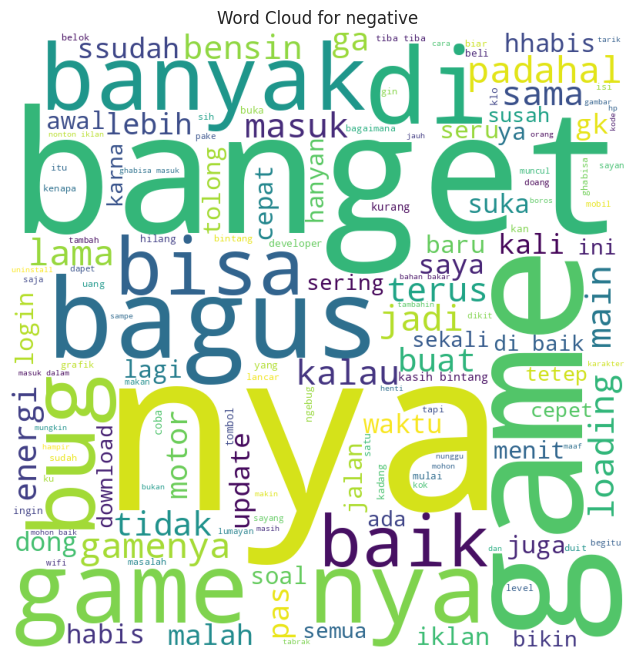

In [33]:
from wordcloud import WordCloud

# Combine text from df_clean for positive and negative sentiment
text_negative = ' '.join(data_negative['content'])
text_positive = ' '.join(data_positive['content'])

# Create a wordCloud for negative sentiment
wordcloud_negative = WordCloud(width = 800, height = 800,
                background_color ='white',
                mode = 'RGBA',
                min_font_size = 10).generate(text_negative)

plt.figure(figsize = (8, 8))
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.title('Word Cloud for negative')
plt.show()

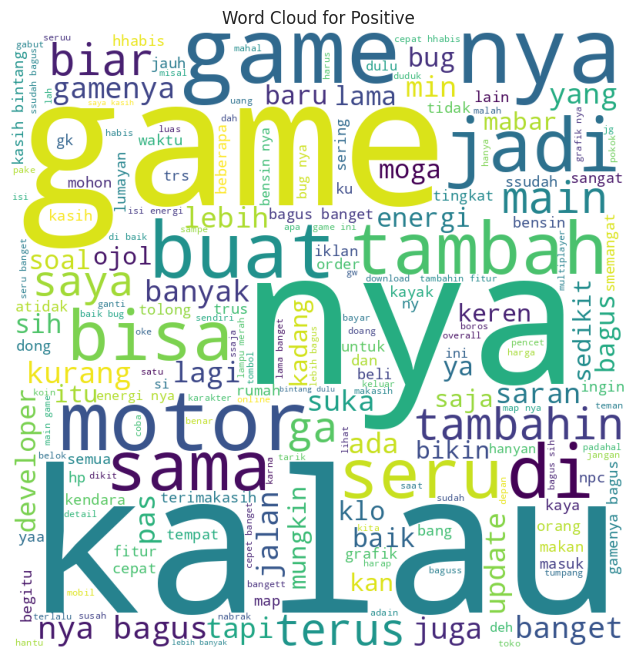

In [34]:
# Create a wordCloud for positive sentiment
wordcloud_positive = WordCloud(width = 800, height = 800,
                background_color ='white',
                mode = 'RGBA',
                min_font_size = 10).generate(text_positive)

plt.figure(figsize = (8, 8))
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.title('Word Cloud for Positive')
plt.show()

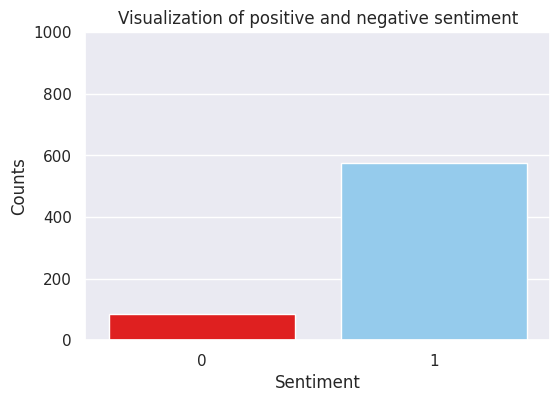

In [42]:
colors = ['#FF0000', '#87CEFA']

plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='sentiment', palette=colors)
plt.title('Visualization of positive and negative sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.ylim(0, 1000)
plt.show()

From the visualization above it can be seen that positive sentiment outweighs negative sentiment

## Data Preprocessing Part 2

In [41]:
# train test split
from sklearn.model_selection import train_test_split
X = df_clean['content']
y = df_clean['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# covert all text of content to numeric feature
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [44]:
# do oversampling the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

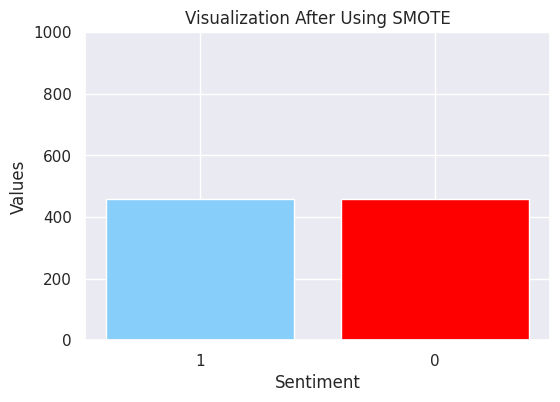

In [47]:
sentiment_count = y_train_resampled.value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_count.index, sentiment_count.values, color=['red', 'lightskyblue'])
plt.xlabel('Sentiment')
plt.ylabel('Values')
plt.ylim(0, 1000)
plt.title('Visualization After Using SMOTE')
plt.xticks(sentiment_count.index, ['0', '1'])
plt.show()

## Modelling & Evaluation

In [51]:
from sklearn.naive_bayes import MultinomialNB

# naive bayes object
naive_bayes = MultinomialNB()
# fitting the model
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [52]:
# predicting the test set
y_pred = naive_bayes.predict(X_test_vec)

In [54]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

print('Classification report: \n',classification_report(y_test, y_pred, target_names=['negatif', 'positif']))
print('Accracy naive bayes model : {:.2f}%'.format(accuracy * 100))

Classification report: 
               precision    recall  f1-score   support

     negatif       0.54      0.41      0.47        17
     positif       0.92      0.95      0.93       116

    accuracy                           0.88       133
   macro avg       0.73      0.68      0.70       133
weighted avg       0.87      0.88      0.87       133

Accracy naive bayes model : 87.97%


## Testing Model

In [57]:
test_text = input('Input new text: ')
test_text_vec = vectorizer.transform([test_text])
predct_test_text = naive_bayes.predict(test_text_vec)

if predct_test_text[0] == 1:
  sentiment_label = 'positive'
elif predct_test_text[0] == 0:
  sentiment_label = 'negative'

print('sentiment analysis results: ', sentiment_label)

Input new text: game rusakk
sentiment analysis results:  negative


**Conclusion:**

in the project above, the model can achieve an accuracy of 88% in sentiment analysis using the Naive Bayes method, we can conclude that the model used has good performance in distinguishing between positive and negative sentiment in reviews of the game "ojol the game". These results show that the Naive Bayes model is able to identify patterns in review text with a high level of success.

The success of this sentiment analysis can provide developers with valuable insight into users' general feelings towards the game "ojol the game". By understanding what users like or dislike, developers can direct improvement or further development efforts to improve the user experience.